In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
import lmdiag

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# Problem 3. Use “Auto” data set

In [2]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [3]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [4]:
auto.select_dtypes(include='object').columns.values

array(['name'], dtype=object)

In [5]:
auto.select_dtypes(exclude='object').columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

### a) Produce a scatterplot matrix which includes all of the variables in the data set (score=2).

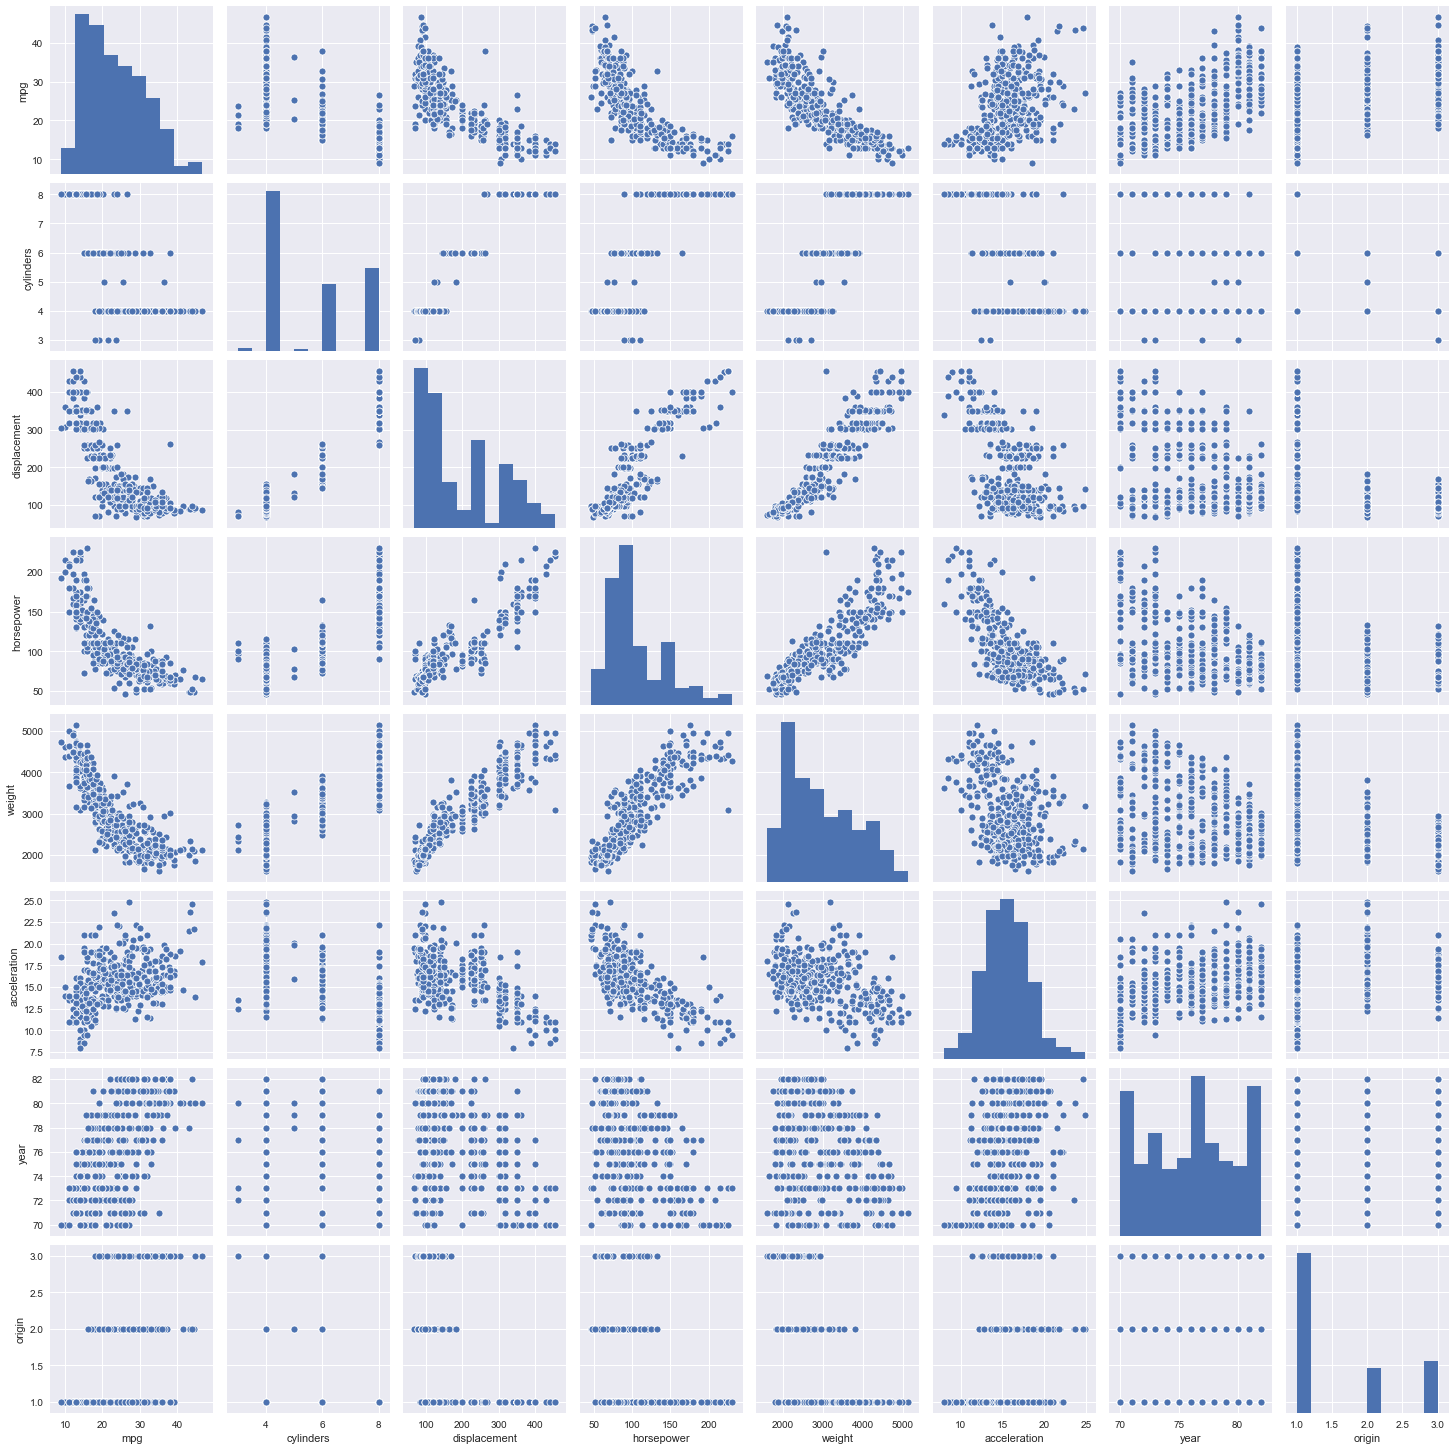

In [6]:
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']])

### b) Compute the matrix of correlations between the variables. You will need to exclude the “name” variable, which is qualitative

In [7]:
auto.drop(["name"], axis=1, inplace=True)

In [8]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


In [9]:
# correlation between features and target variable
# auto.drop(["mpg", "name"], axis=1).apply(lambda x: x.corr(auto.mpg))

In [10]:
corr = auto.corr()

In [11]:
corr.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209


In [12]:
corr.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [13]:
corr.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

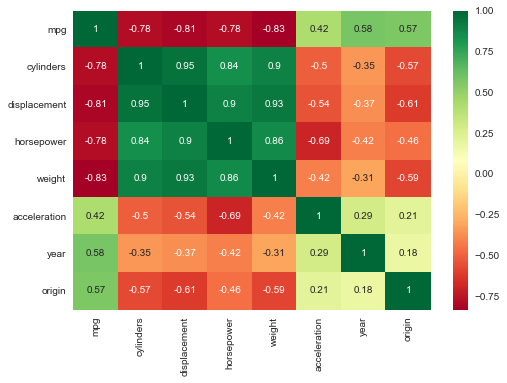

In [14]:
corr = auto.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="RdYlGn",
            annot=True
           );

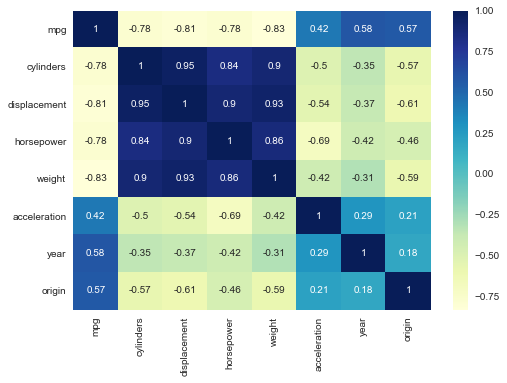

In [15]:
corr = auto.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values, # labels on X axis
            yticklabels=corr.columns.values, # labels on Y axis
            cmap="YlGnBu", # Heatmap colorset
            annot=True # Annotations as correlation values on heatmap squares
           );

### c) Perform a multiple linear regression with “mpg” as the response and all other variables except “name” as the predictors. Comment on the output:
I. Is there a relationship between the predictors and the response?  
II. Which predictors appear to have a statistically significant relationship to the response?  
III.What does the coefficient for the “year” variable suggest?

In [16]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [17]:
auto.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'], dtype=object)

In [18]:
auto_full_regression = smf.ols(
    formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", 
    data=auto).fit()

In [19]:
print(auto_full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        20:31:04   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

`NOTE 1`: In simple words, Correlation and Covarience, both measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

`NOTE 2`: So the predictors "displacement", "weight", "year" and "origin" are statistically significant because their corresponding p-value is lesser than 0.005, therefore we can say that there is a relationship between the predictors(some of them) and the response.  
The coefficient of year variable is equal to 0.7508, which indicates that for every additional number in year we can expect mpg to increase by an average of 0.7508 unit.

In [20]:
# Optional: you can see in here what happens when you eliminate statistically non-significant features

significant_features_auto_full_regression = smf.ols(
    formula="mpg ~ displacement + weight + year + origin", data=auto).fit()

print(significant_features_auto_full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          9.57e-142
Time:                        20:31:04   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.6065      4.028     -4.620   

### d) Produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit

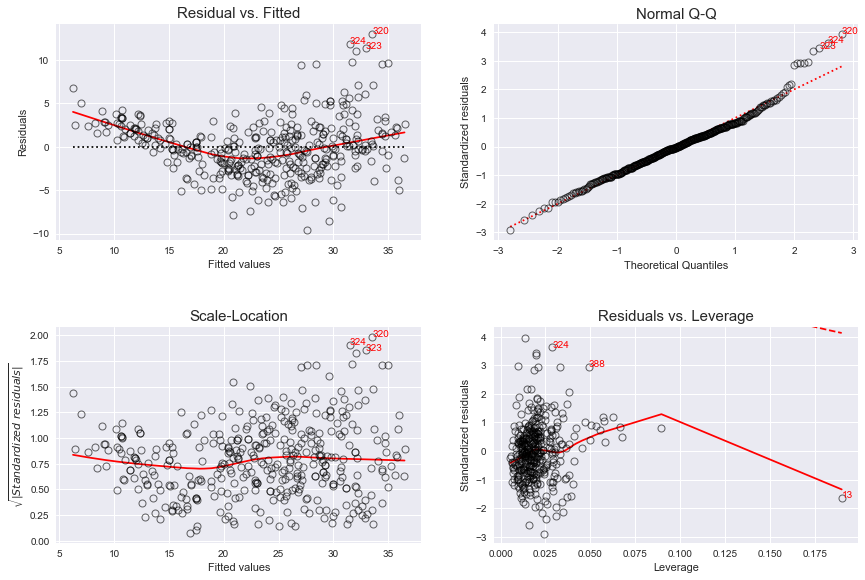

In [21]:
plt.figure(figsize=(12,8))
lmdiag.plot(auto_full_regression)
plt.show();

I see a parabola in residual vs. fitted values plot, so the non-linear relationship was not explained by the model and was left out in the residuals.

### e) Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage

In [22]:
outliers = auto.index.isin([320, 323, 324])
auto = auto[~outliers]

### f) Add interaction effects. Do any interactions appear to be statistically significant

In [23]:
new_features = ("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + "
     "cylinders*displacement + "
     "cylinders*horsepower + "
     "cylinders*weight + "
     "cylinders*acceleration + "
     "cylinders*year + "
     "cylinders*origin + "
     "displacement*horsepower + "
     "displacement*weight + "
     "displacement*acceleration + "
     "displacement*year + "
     "displacement*origin + "
     "horsepower*weight + "
     "horsepower*acceleration + "
     "horsepower*year + "
     "horsepower*origin + "
     "weight*acceleration + "
     "weight*year + "
     "weight*origin + "
     "acceleration*year + "
     "acceleration*origin + "
     "year*origin"
    )


In [24]:
auto_with_interaction_regression = smf.ols(formula=new_features, data=auto).fit()

In [25]:
print(auto_with_interaction_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.87e-154
Time:                        20:31:06   Log-Likelihood:                -918.10
No. Observations:                 389   AIC:                             1894.
Df Residuals:                     360   BIC:                             2009.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

`NOTE`:So we have 28 features. In order to choose important ones from them we can do a linear regression, and then take the statisticaly significant regressors.  
Another way to do that is using regularisation.  

```With taken into consideration p-values, we can choose the following features:  
acceleration * origin  
acceleration * year  
origin  
displacement  
acceleration  
displacement * year  
```

### g) Try a few different transformations of the variables, such as log(X),√X, X^2.   Comment on your findings

#### 1. Log transfortmations of features

In [26]:
auto_log_features = np.log(
    auto[['cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'year', 'origin']]
)

In [27]:
auto_log = pd.concat([auto.mpg, auto_log_features], axis=1, sort=False)

In [28]:
auto_log.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.0
1,15.0,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.0
2,18.0,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.0
3,16.0,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.0
4,17.0,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.0


In [29]:
auto_log_features_regression = smf.ols(
    formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto_log).fit()

In [30]:
print(auto_log_features_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     307.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.91e-152
Time:                        20:31:06   Log-Likelihood:                -979.61
No. Observations:                 389   AIC:                             1975.
Df Residuals:                     381   BIC:                             2007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -61.9739     17.371     -3.568   

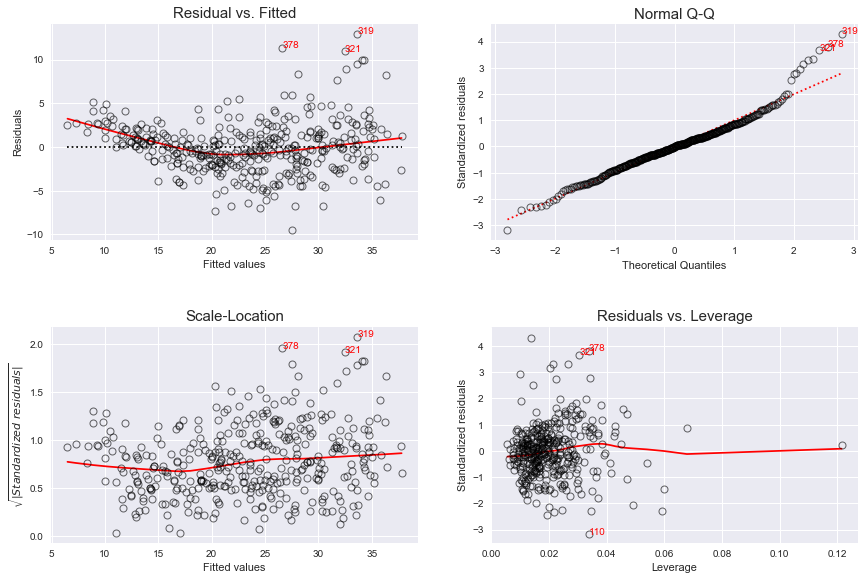

In [31]:
plt.figure(figsize=(12,8))
lmdiag.plot(auto_log_features_regression)
plt.show();

#### 2. Square root transfortmations of features

In [32]:
auto_sqrt_features = np.sqrt(
    auto[['cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'year', 'origin']]
)

In [33]:
auto_sqrt = pd.concat([auto.mpg, auto_sqrt_features], axis=1, sort=False)

In [34]:
auto_sqrt.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,15.0,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,18.0,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,16.0,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,17.0,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


In [35]:
auto_sqrt_features_regression = smf.ols(
    formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto_sqrt).fit()

In [36]:
print(auto_sqrt_features_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     274.3
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.64e-144
Time:                        20:31:08   Log-Likelihood:                -998.31
No. Observations:                 389   AIC:                             2013.
Df Residuals:                     381   BIC:                             2044.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -47.4286      9.132     -5.193   

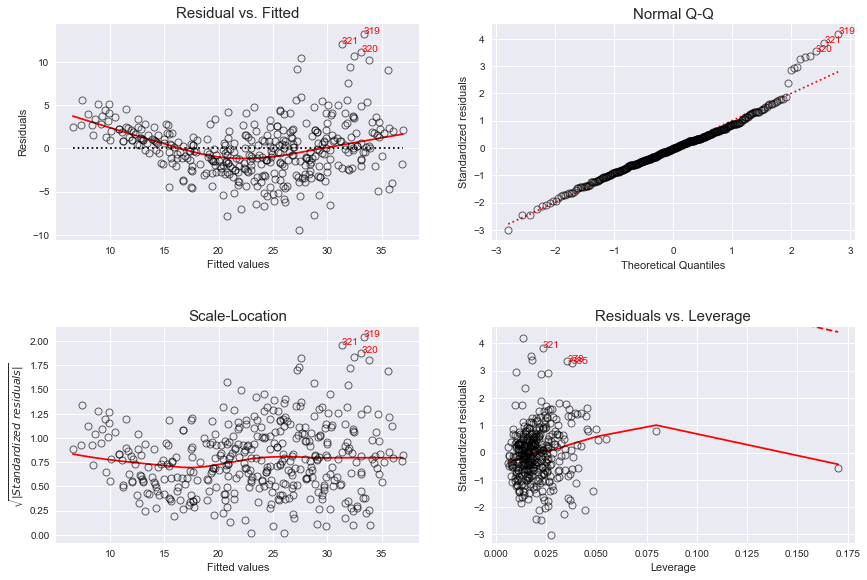

In [37]:
plt.figure(figsize=(12,8))
lmdiag.plot(auto_sqrt_features_regression)
plt.show();

#### 3. Square transfortmations of features

In [38]:
auto_square_features = np.square(auto[
    ['cylinders', 'displacement', 'horsepower', 
     'weight', 'acceleration', 'year', 'origin']])

In [39]:
auto_square = pd.concat([auto.mpg, auto_square_features], axis=1, sort=False)

In [40]:
auto_square.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,64.0,94249.0,16900.0,12278016.0,144.00,4900.0,1.0
1,15.0,64.0,122500.0,27225.0,13638249.0,132.25,4900.0,1.0
2,18.0,64.0,101124.0,22500.0,11806096.0,121.00,4900.0,1.0
3,16.0,64.0,92416.0,22500.0,11785489.0,144.00,4900.0,1.0
4,17.0,64.0,91204.0,19600.0,11895601.0,110.25,4900.0,1.0


In [41]:
auto_square_features_regression = smf.ols(
    formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto_square).fit()

In [42]:
print(auto_square_features_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     213.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.11e-127
Time:                        20:31:10   Log-Likelihood:                -1038.0
No. Observations:                 389   AIC:                             2092.
Df Residuals:                     381   BIC:                             2124.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6376      2.353      0.696   

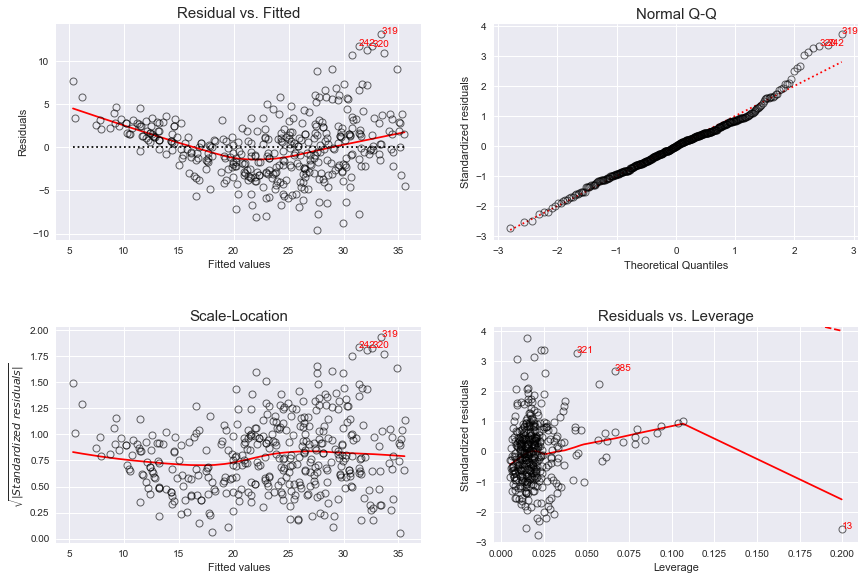

In [43]:
plt.figure(figsize=(12,8))
lmdiag.plot(auto_square_features_regression)
plt.show();

`NOTE`: Comparing the results obtained above, we get the best model with log-transformed data.